**Unsupervised Learning with Python.**

In [43]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [44]:
df = pd.read_csv('Mall_Customers.csv')

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
df.sample()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
180,181,Female,37,97,32


In [47]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


In [48]:
df.shape

(250, 5)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


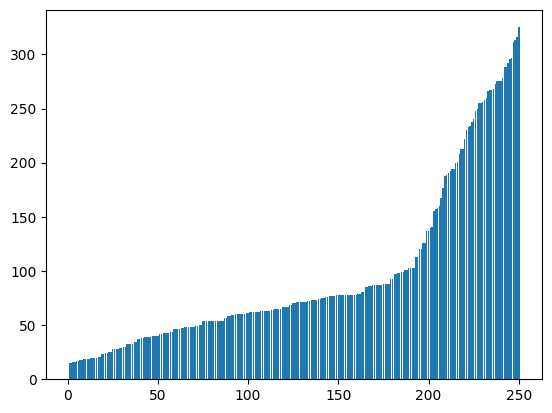

In [50]:
plt.bar(df['CustomerID'],df['Annual Income (k$)'])
plt.show()

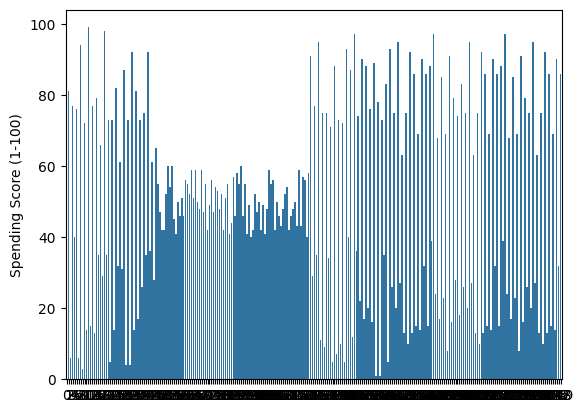

In [51]:
sns.barplot(df['Spending Score (1-100)'])
plt.show()

In [52]:
x = df.iloc[:,3:5].values

In [53]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [54]:
y = df.drop(['Annual Income (k$)','Spending Score (1-100)'],axis=1)

In [55]:
y

,CustomerID,Gender,Age
0,1,Male,19
1,2,Male,21
2,3,Female,20
3,4,Female,23
4,5,Female,31
...,...,...,...
245,246,Male,30
246,247,Female,56
247,248,Male,29
248,249,Female,19


In [56]:
from sklearn.cluster import KMeans
wcss_list = []

[1673624.5]
[1673624.5, 440146.70193894394]
[1673624.5, 440146.70193894394, 350813.6678487494]
[1673624.5, 440146.70193894394, 350813.6678487494, 257469.2495581976]
[1673624.5, 440146.70193894394, 350813.6678487494, 257469.2495581976, 226845.86790239363]
[1673624.5, 440146.70193894394, 350813.6678487494, 257469.2495581976, 226845.86790239363, 160901.92915504624]
[1673624.5, 440146.70193894394, 350813.6678487494, 257469.2495581976, 226845.86790239363, 160901.92915504624, 128434.201055407]
[1673624.5, 440146.70193894394, 350813.6678487494, 257469.2495581976, 226845.86790239363, 160901.92915504624, 128434.201055407, 99238.2480704213]
[1673624.5, 440146.70193894394, 350813.6678487494, 257469.2495581976, 226845.86790239363, 160901.92915504624, 128434.201055407, 99238.2480704213, 78123.16798641862]
[1673624.5, 440146.70193894394, 350813.6678487494, 257469.2495581976, 226845.86790239363, 160901.92915504624, 128434.201055407, 99238.2480704213, 78123.16798641862, 69006.68032028359]


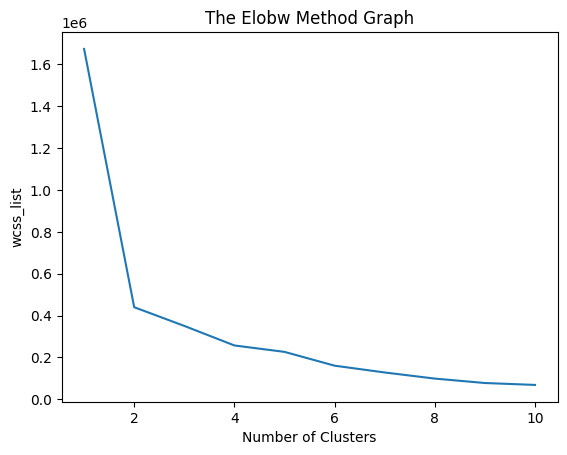

In [57]:
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,init='k-means++',random_state =42)
    Kmeans.fit(x)
    wcss_list.append(Kmeans.inertia_)
    print(wcss_list)

plt.plot(range(1,11),wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss_list')
plt.show()

In [58]:
Kmeans = KMeans(n_clusters=6,init='k-means++',random_state =42)
y_predict = Kmeans.fit_predict(x)

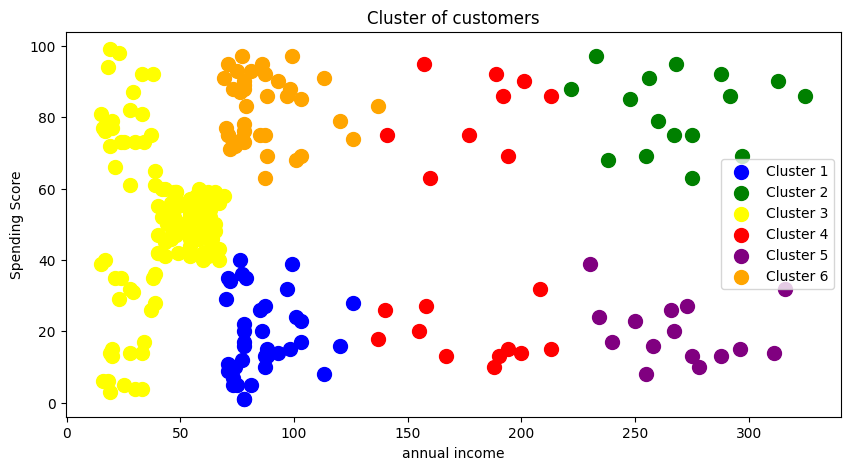

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(x[y_predict ==0, 0],x[y_predict ==0, 1], s=100, c = 'blue', label="Cluster 1")
plt.scatter(x[y_predict ==1, 0],x[y_predict ==1, 1], s=100, c = 'green', label= "Cluster 2")
plt.scatter(x[y_predict ==2, 0],x[y_predict ==2, 1], s=100, c = 'yellow', label="Cluster 3")
plt.scatter(x[y_predict ==3, 0],x[y_predict ==3, 1], s=100, c = 'red', label= "Cluster 4")
plt.scatter(x[y_predict ==4, 0],x[y_predict ==4, 1], s=100, c = 'purple', label="Cluster 5")
plt.scatter(x[y_predict ==5, 0],x[y_predict ==5, 1], s=100, c = 'orange', label= "Cluster 6")
plt.title("Cluster of customers")
plt.xlabel("annual income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import silhouette_score

In [65]:
silhouette_avg = silhouette_score(x,y_predict)

In [66]:
print(f"Value is {silhouette_avg:.2f}")

Value is 0.45


# **DBSCAN Clustering**